In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
travel = pd.read_csv("travel_insurance_vlad.csv",delimiter=",")

In [3]:
travel.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [4]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
Agency                  63326 non-null object
Agency Type             63326 non-null object
Distribution Channel    63326 non-null object
Product Name            63326 non-null object
Claim                   63326 non-null object
Duration                63326 non-null int64
Destination             63326 non-null object
Net Sales               63326 non-null float64
Commision (in value)    63326 non-null float64
Gender                  18219 non-null object
Age                     63326 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


     lot of null values in Gender column 
     check for null values across other columns

In [5]:
print(travel['Gender'].value_counts())
print(travel.isnull().any())
print(travel['Gender'].isnull().sum())
print(travel['Claim'].value_counts())

M    9347
F    8872
Name: Gender, dtype: int64
Agency                  False
Agency Type             False
Distribution Channel    False
Product Name            False
Claim                   False
Duration                False
Destination             False
Net Sales               False
Commision (in value)    False
Gender                   True
Age                     False
dtype: bool
45107
No     62399
Yes      927
Name: Claim, dtype: int64


    so 45107 null values in Gender. which is a lot. We can drop the NA values

In [6]:
travel = travel.dropna()
print(travel.isnull().any())

Agency                  False
Agency Type             False
Distribution Channel    False
Product Name            False
Claim                   False
Duration                False
Destination             False
Net Sales               False
Commision (in value)    False
Gender                  False
Age                     False
dtype: bool


    Let's explore the Age column 

In [7]:
travel['Age'].describe()

count    18219.000000
mean        44.785444
std         20.894323
min          0.000000
25%         31.000000
50%         40.000000
75%         52.000000
max        118.000000
Name: Age, dtype: float64

    So the min does not really make sense to be 0. Highly doubt the max with 118. That must be really old man or lady. 

In [8]:
travel['Age'].value_counts()

48     976
118    841
30     680
28     612
31     580
27     559
32     558
33     557
29     552
36     491
34     486
35     461
37     455
26     452
39     433
38     424
45     393
25     393
43     372
41     363
40     362
44     357
42     347
47     330
46     311
24     304
49     286
53     275
51     255
50     254
      ... 
77      29
76      27
79      25
17      24
16      21
80      20
84      19
81      19
78      18
14      15
82      14
83      13
15      12
85       8
87       7
13       7
10       6
9        6
8        6
11       5
12       5
1        5
88       4
3        4
7        4
5        3
86       3
0        2
2        1
4        1
Name: Age, Length: 89, dtype: int64

In [9]:
travel = travel[travel.Age != 118]

    removed the 118 Age value. Now let's explore the duration of the travel

In [10]:
travel['Duration'].describe()

count    17378.000000
mean        70.628784
std        115.088822
min          0.000000
25%          9.000000
50%         21.000000
75%         59.000000
max        740.000000
Name: Duration, dtype: float64

Duration of 0 - wonder what it means. There is also some negative values for the duration like -2,-1.

We can also do some graphs with seaborn library for better visualization:Claims and Gender

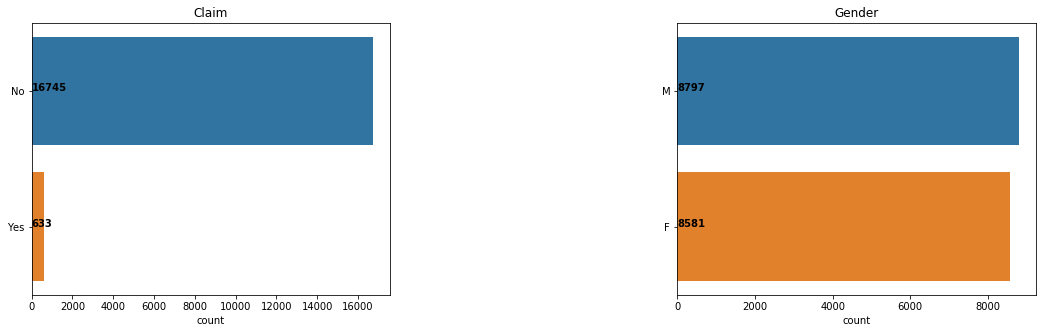

In [73]:
f,ax=plt.subplots(1,2,figsize=(18,5))
g=sns.countplot(y=travel.Claim,order=travel.Claim.value_counts().index,ax=ax[0])
for i,v in enumerate(travel.Claim.value_counts().values):
    g.text(0.5,i,v,weight="bold")
ax[0].set_title("Claim")
ax[0].set_ylabel("")

f=sns.countplot(y=travel.Gender,order=travel["Gender"].value_counts().index,ax=ax[1])
for i,v in enumerate(travel.Gender.value_counts().values):
    f.text(0.5,i,v,weight="bold")
ax[1].set_title("Gender")
ax[1].set_ylabel("")
plt.subplots_adjust(wspace=0.8)

We can also explore a combination between Gender and Duration or Gender and claims with graphs. 

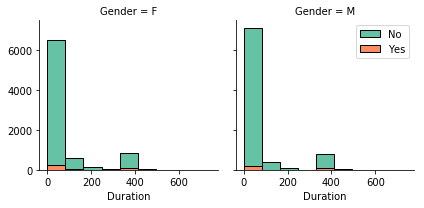

In [20]:
bins = np.linspace(travel.Duration.min(), travel.Duration.max(), 10)
g = sns.FacetGrid(travel, col="Gender", hue="Claim", palette="Set2", col_wrap=2)
g.map(plt.hist, 'Duration', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

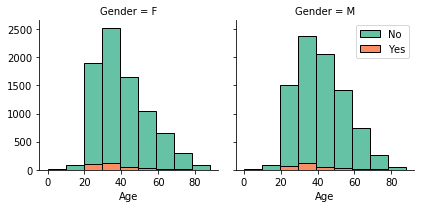

In [21]:
bins = np.linspace(travel.Age.min(), travel.Age.max(),10)
g = sns.FacetGrid(travel, col='Gender',hue='Claim', palette='Set2', col_wrap=2)
g.map(plt.hist, 'Age', bins=bins, ec='k')

g.axes[-1].legend()
plt.show()

we  can see the distribution across the Age and Claims splitted by Gender.